In [110]:
import pandas as pd
#pandas
import numpy as np
#numpy
import matplotlib.pyplot as plt
#matplotlib
import seaborn as sns
#seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#sklearn
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#keras
#tensorflow
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk
import re
import os
#other useful stuff
from wordcloud import WordCloud, STOPWORDS
#wordclouds and cloud stopwords
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Initial Data Exploration

In [111]:
data = pd.read_csv('merged.csv', encoding = 'utf-8', header=0)

In [112]:
data.head(20)

,emergency_,created_at,screen_name,tweet_text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,non-emergency,2022-05-14 19:07:00 PDT,dailystar,Elon Musk warns 'bots are angry' as bid to buy...,NaN,NaN,NaN,NaN,NaN
1,non-emergency,2022-05-14 18:52:00 PDT,dailystar,Britney Spears loses 'miracle baby' as devasta...,NaN,NaN,NaN,NaN,NaN
2,non-emergency,2022-05-14 18:34:28 PDT,dailystar,Spain cause a stir with jaw-dropping performan...,NaN,NaN,NaN,NaN,NaN
3,non-emergency,2022-05-14 18:26:00 PDT,dailystar,"Queen's Jubilee to see RAF, Army and Royal Nav...",NaN,NaN,NaN,NaN,NaN
4,non-emergency,2022-05-14 18:13:00 PDT,dailystar,Corrie's Yasmeen star praises Mel B for helpin...,NaN,NaN,NaN,NaN,NaN
5,non-emergency,2022-05-14 18:11:00 PDT,dailystar,#EastEnders' Katie Jarvis 'ruined my life' cla...,NaN,NaN,NaN,NaN,NaN
6,non-emergency,2022-05-14 18:09:01 PDT,dailystar,Lisa Armstrong shares tribute to honour father...,NaN,NaN,NaN,NaN,NaN
7,non-emergency,2022-05-14 18:05:00 PDT,dailystar,Graham Norton praised by #Eurovision fans afte...,NaN,NaN,NaN,NaN,NaN
8,non-emergency,2022-05-14 17:56:59 PDT,dailystar,Putin only has 'two ships left' but rocket thr...,NaN,NaN,NaN,NaN,NaN
9,non-emergency,2022-05-14 17:06:20 PDT,dailystar,"Queen's Jubilee to see RAF, Army and Royal Nav...",NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [113]:
data[data['emergency_']=='emergency']['tweet_text'].head()
data.loc[(data['emergency_'] == 'emergency')]


,emergency_,created_at,screen_name,tweet_text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
2577,emergency,2022-05-14 15:53:02 PDT,SanMateoPD,@SamTrans UPDATE (3:30pm): S/B El Camino from...,NaN,NaN,NaN,NaN,NaN
2578,emergency,2022-05-14 15:52:05 PDT,SanMateoPD,@kletter @SamTrans Time of death will be deter...,NaN,NaN,NaN,NaN,NaN
2579,emergency,2022-05-14 09:38:15 PDT,SanMateoPD,We are currently investigating a suspicious de...,NaN,NaN,NaN,NaN,NaN
2580,emergency,2022-05-11 11:04:00 PDT,SanMateoPD,San Mateo PD is happy to announce applications...,NaN,NaN,NaN,NaN,NaN
2582,emergency,2022-04-28 18:41:19 PDT,SanMateoPD,Couple Arrested on Drug and Property Charges a...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3174,emergency,2022-05-04 14:30:04 PDT,NBCNewYork,The shirt worn by Diego Maradona when he score...,NaN,NaN,NaN,NaN,NaN
3175,emergency,2022-05-04 13:53:49 PDT,NBCNewYork,#BREAKING U.S. surpasses grim milestone Wednes...,NaN,NaN,NaN,NaN,NaN
3176,emergency,2022-05-04 13:00:19 PDT,NBCNewYork,Post Malone has a little rockstar on the way! ...,NaN,NaN,NaN,NaN,NaN
3177,emergency,2022-05-04 12:30:16 PDT,NBCNewYork,"What is ""dirty soda""? Utah's beloved drink is ...",NaN,NaN,NaN,NaN,NaN


In [124]:
df1 = data.loc[(data['emergency_'] == 'emergency')]
df2 = data.loc[(data['emergency_'] == 'non-emergency')]

# Shuffle all the non-emergency tweets
df2 = df2.sample(frac=1).reset_index(drop=True)
df2_balanced = np.array_split(df2, len(df1))[0]

data = pd.concat([df1, df2.head(543)])


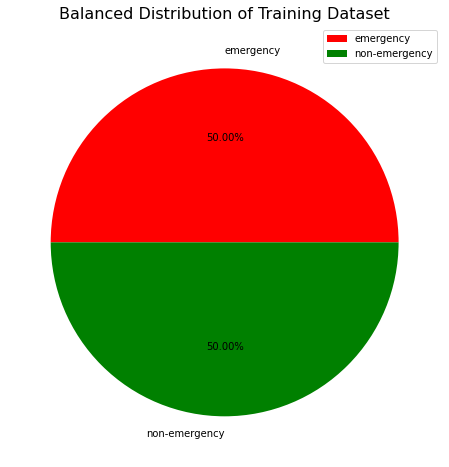

In [125]:
fig = plt.figure(figsize=(8,8))
targets = data.groupby('emergency_').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Balanced Distribution of Training Dataset",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

Add Length of Tweet

In [126]:
data['length'] = data.tweet_text.str.split().apply(len)

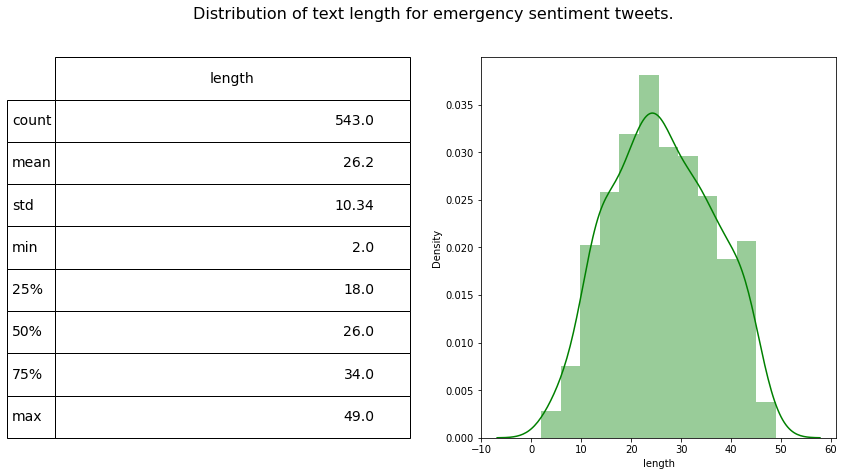

In [127]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['emergency_']=='emergency']['length'], ax=ax1,color='green')
describe = data.length[data.emergency_=='emergency'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for emergency sentiment tweets.', fontsize=16)

plt.show()

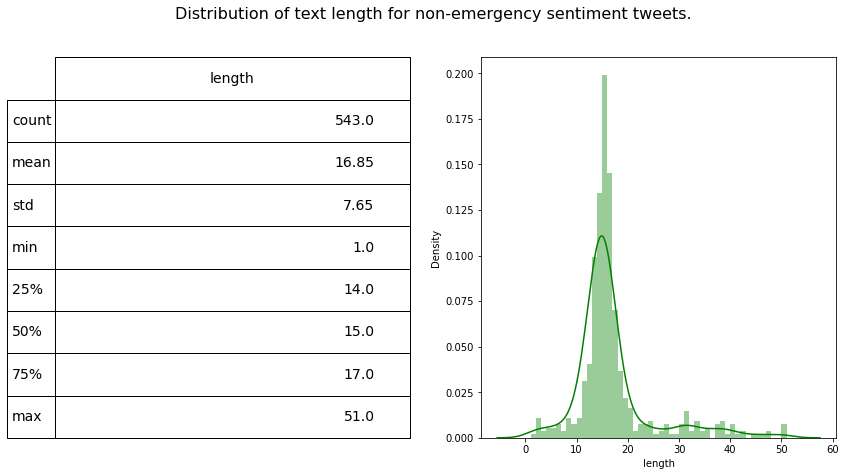

In [128]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['emergency_']=='non-emergency']['length'], ax=ax1,color='green')
describe = data.length[data.emergency_=='non-emergency'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for non-emergency sentiment tweets.', fontsize=16)

plt.show()

In [129]:
data.drop(['created_at','screen_name'], axis=1, inplace=True)

In [132]:
data.head()

,emergency_,tweet_text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,length
2577,emergency,@SamTrans UPDATE (3:30pm): S/B El Camino from...,NaN,NaN,NaN,NaN,NaN,14
2578,emergency,@kletter @SamTrans Time of death will be deter...,NaN,NaN,NaN,NaN,NaN,32
2579,emergency,We are currently investigating a suspicious de...,NaN,NaN,NaN,NaN,NaN,34
2580,emergency,San Mateo PD is happy to announce applications...,NaN,NaN,NaN,NaN,NaN,23
2582,emergency,Couple Arrested on Drug and Property Charges a...,NaN,NaN,NaN,NaN,NaN,11


In [133]:
data.emergency_ = data.emergency_.replace({'emergency': 1, 'non-emergency': 0})

In [134]:
english_stopwords = stopwords.words('english')

stemmer = SnowballStemmer('english')

regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [135]:
def preprocess(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [137]:
data.tweet_text = data.tweet_text.apply(lambda x: preprocess(x))
data.head()

,emergency_,tweet_text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,length
2577,1,updat 3 30pm b el camino hillsdal 37th ave ful...,NaN,NaN,NaN,NaN,NaN,14
2578,1,samtran time death determin coron found 7am ev...,NaN,NaN,NaN,NaN,NaN,32
2579,1,current investig suspici death bus stop el cam...,NaN,NaN,NaN,NaN,NaN,34
2580,1,san mateo pd happi announc applic 2nd communit...,NaN,NaN,NaN,NaN,NaN,23
2582,1,coupl arrest drug properti charg foot pursuit,NaN,NaN,NaN,NaN,NaN,11


In [138]:
train, test = train_test_split(data, test_size=0.1, random_state=44)

In [139]:
print('Train dataset shape: {}'.format(train.shape))
print('Test dataset shape: {}'.format(test.shape))

Train dataset shape: (977, 8)
Test dataset shape: (109, 8)


# Neural Network Model

In [141]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.tweet_text)  
vocab_size = len(tokenizer.word_index) + 1 
max_length = 50

In [143]:
sequences_train = tokenizer.texts_to_sequences(train.tweet_text) 
sequences_test = tokenizer.texts_to_sequences(test.tweet_text) 

X_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

y_train = train.emergency_.values
y_test = test.emergency_.values

In [157]:
sequences_test

[[173,
  397,
  291,
  1630,
  259,
  260,
  488,
  1631,
  101,
  258,
  203,
  329,
  354,
  1071,
  1150,
  841],
 [1634, 1153, 11, 25, 1635, 1636, 106, 85],
 [1887,
  46,
  2043,
  633,
  654,
  156,
  7,
  2038,
  938,
  33,
  907,
  1093,
  11,
  2039,
  3614,
  325,
  15,
  2040,
  325,
  1099],
 [2637,
  5,
  3,
  21,
  3441,
  1665,
  2639,
  3046,
  62,
  1233,
  97,
  600,
  206,
  470,
  3415,
  558,
  46,
  3576,
  2080,
  1197],
 [1506,
  151,
  362,
  1735,
  1682,
  616,
  1949,
  33,
  1080,
  68,
  1166,
  189,
  3029,
  203,
  1539,
  1735,
  2938,
  959,
  1243,
  1949],
 [1262, 3386, 280, 7, 1316, 1702, 649, 1052, 1031, 1611, 22, 331, 956],
 [1189,
  149,
  194,
  137,
  185,
  635,
  1301,
  1239,
  1,
  6,
  382,
  31,
  205,
  662,
  431,
  194,
  205,
  170,
  471,
  125,
  202,
  145,
  220],
 [14, 67, 254, 2],
 [3695, 1147, 52, 622, 1094, 2194, 373, 1625],
 [1020, 2, 12, 179, 63, 498, 233, 1669, 2828, 773, 9, 1269, 693, 50],
 [96, 35, 3662, 26, 3762, 1071, 36

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip


In [147]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [148]:
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open('glove.6B.100d.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

embeddings_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddings_matrix[index] = embedding_vector

In [149]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)

In [151]:
num_epochs = 10
batch_size = 1000

In [150]:
model = Sequential([
        embedding_layer,
        tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Bidirectional(LSTM(128)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           396700    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [152]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)
modeel.summary()

Epoch 1/10
1/1 - 16s - loss: 0.6901 - accuracy: 0.5015 - val_loss: 0.6652 - val_accuracy: 0.6147 - 16s/epoch - 16s/step
Epoch 2/10
1/1 - 5s - loss: 0.6651 - accuracy: 0.5578 - val_loss: 0.6462 - val_accuracy: 0.6147 - 5s/epoch - 5s/step
Epoch 3/10
1/1 - 5s - loss: 0.6419 - accuracy: 0.6018 - val_loss: 0.6241 - val_accuracy: 0.6514 - 5s/epoch - 5s/step
Epoch 4/10
1/1 - 5s - loss: 0.6128 - accuracy: 0.6858 - val_loss: 0.5958 - val_accuracy: 0.7064 - 5s/epoch - 5s/step
Epoch 5/10
1/1 - 5s - loss: 0.5743 - accuracy: 0.7697 - val_loss: 0.5637 - val_accuracy: 0.7431 - 5s/epoch - 5s/step
Epoch 6/10
1/1 - 5s - loss: 0.5286 - accuracy: 0.8055 - val_loss: 0.5344 - val_accuracy: 0.7248 - 5s/epoch - 5s/step
Epoch 7/10
1/1 - 5s - loss: 0.4804 - accuracy: 0.8106 - val_loss: 0.5241 - val_accuracy: 0.7523 - 5s/epoch - 5s/step
Epoch 8/10
1/1 - 5s - loss: 0.4514 - accuracy: 0.7943 - val_loss: 0.5467 - val_accuracy: 0.7156 - 5s/epoch - 5s/step
Epoch 9/10
1/1 - 5s - loss: 0.4348 - accuracy: 0.7922 - val_l

In [159]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.96      0.70        47
           1       0.93      0.42      0.58        62

    accuracy                           0.65       109
   macro avg       0.74      0.69      0.64       109
weighted avg       0.77      0.65      0.63       109



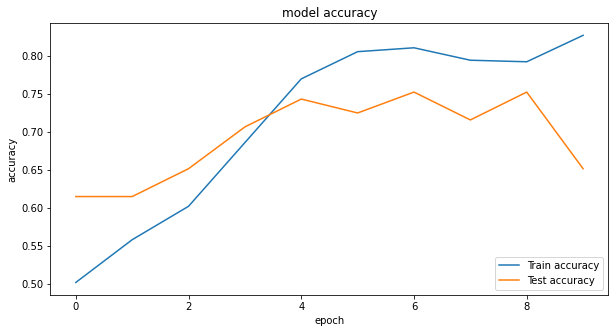

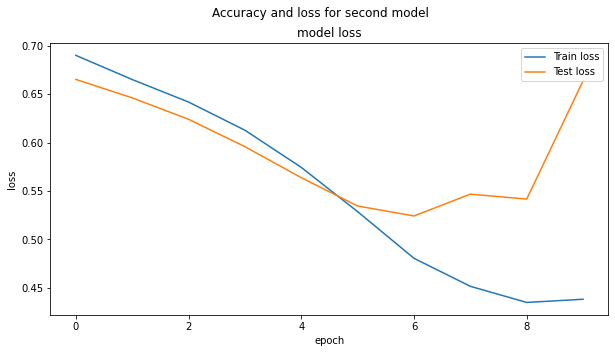

In [154]:
# History for accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()

# History for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.suptitle('Accuracy and loss for second model')
plt.show()

## Model Deployment Steps

In [155]:
model.save('tfmodel.h5')

# Logistic Regression